# Final Project
## Breena Smith
### 12/09/2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import json

I wanted to try and compare and contrast different consoles to each other, from when I was a child just to see what did so well. As a child I was given mainly Nintendo Consoles, so when the Wii had come out I played the most on that. However, the PS2 had released beforehand and competed with the Wii. They were some of the most sold consoles at the time, and it created a generation of kids who either loved Wii, or loved the PS2. Personally, I believe that the Wii did better in sales and with games given how revolutionary it was with its motion controls, where the PS2 was still needing button presses for their games. I'm not saying one is better than the other, just that the Wii was huge for the time and brought on the wave of trying to make games using motions and our bodies. I would pit it against the kinect but that console just wasn't as good in the long run. 

I wanted to do something with video games due to me minoring in Game Design, but also because the topic is interesting. I used to like watching videos that would talk about different sales and statictics from consoles back in my childhood, and I wanted to try and see for myself what I could find. The Data I found worked for what I wanted, as it covered sales from all over, the consoles and the games that come with them. One of them goes more in depth with the sales and games, where the other data set is more focused on the games rather than the consoles and sales. With one, I want to compare the money value and with the other, I want to see the critic scores between the games on the consoles. Some games do cross over so I want to see how the did on one console compared to the other. So far what I have learned is the PS2 sold really well in the early years after its launch but the Wii continued to keep selling more and mo

In [2]:
con = pd.read_csv(r"C:\Users\thegr\Downloads\video-game-sales.csv")
con.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
game = pd.read_csv(r"C:\Users\thegr\Downloads\Extracted_video_games_data.csv")
game.head()

,Pos,Game,Game.1,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,Genre
0,1,NaN,God of War,Series,Sony Computer Entertainment,SIE Santa Monica Studio,NaN,NaN,NaN,51.00m,NaN,NaN,NaN,NaN,NaN,22nd Mar 05,04th Mar 20,Action
1,2,NaN,Warriors,Series,KOEI,Omega Force,NaN,NaN,NaN,45.26m,NaN,NaN,NaN,NaN,NaN,30th Jun 97,24th Mar 20,Action
2,3,NaN,Devil May Cry,Series,Capcom,Capcom,NaN,NaN,NaN,22.00m,NaN,NaN,NaN,NaN,NaN,16th Oct 01,03rd Feb 20,Action
3,4,NaN,Dynasty Warriors,Series,Unknown,Omega Force,NaN,NaN,NaN,21.00m,NaN,NaN,NaN,NaN,NaN,NaN,24th Mar 20,Action
4,5,NaN,Grand Theft Auto V,PS3,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32m,6.37m,9.85m,0.99m,3.12m,17th Sep 13,NaN,Action


In [4]:
con.keys()

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
WG = con.loc[con['Platform'] == 'Wii']
pd.DataFrame(WG)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16517,16520,Teenage Mutant Ninja Turtles,Wii,2007.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16552,16555,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007.0,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16573,16576,Mini Desktop Racing,Wii,2007.0,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
16574,16577,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01


In [6]:
PS2 = con.loc[con['Platform'] == 'PS2']
pd.DataFrame(PS2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
...,...,...,...,...,...,...,...,...,...,...,...
16559,16562,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008.0,Adventure,Alchemist,0.00,0.00,0.01,0.00,0.01
16561,16564,Kanokon: Esuii,PS2,2008.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16572,16575,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16580,16583,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01


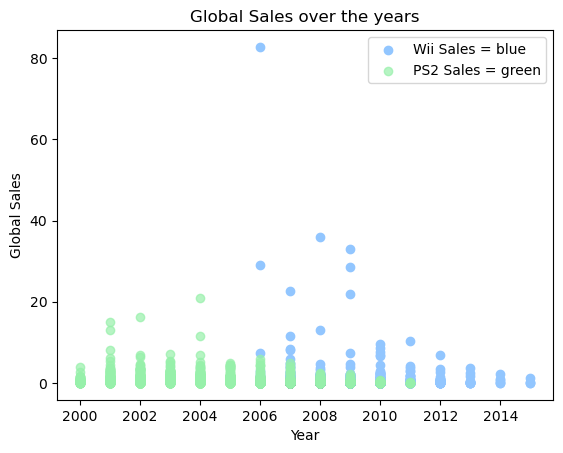

In [11]:
fig1, ax1 = plt.subplots()
ax1.set_title ('Global Sales over the years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Global Sales')
ax1.scatter(WG['Year'], WG['Global_Sales'])
ax1.scatter(PS2['Year'], PS2['Global_Sales'], alpha = .7)
ax1.legend(['Wii Sales = blue', 'PS2 Sales = green'])
plt.style.use('seaborn-v0_8-pastel')
plt.show()

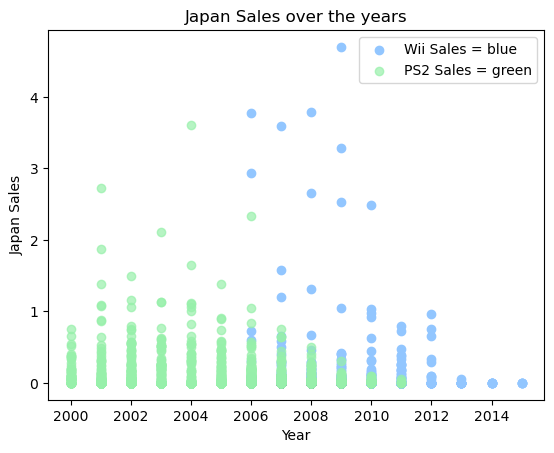

In [8]:
fig2, ax2 = plt.subplots()
ax2.set_title ('Japan Sales over the years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Japan Sales')
ax2.scatter(WG['Year'], WG['JP_Sales'])
ax2.scatter(PS2['Year'], PS2['JP_Sales'], alpha = .7)
ax2.legend(['Wii Sales = blue', 'PS2 Sales = green'])
plt.style.use('seaborn-v0_8-pastel')
plt.show()

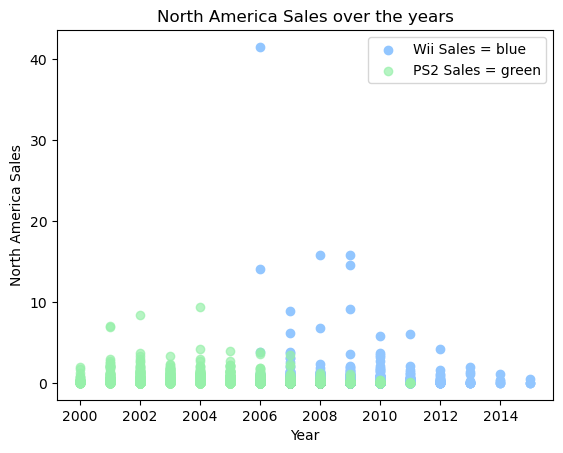

In [9]:
fig3, ax3 = plt.subplots()
ax3.set_title ('North America Sales over the years')
ax3.set_xlabel('Year')
ax3.set_ylabel('North America Sales')
ax3.scatter(WG['Year'], WG['NA_Sales'])
ax3.scatter(PS2['Year'], PS2['NA_Sales'], alpha = .7)
ax3.legend(['Wii Sales = blue', 'PS2 Sales = green'])
plt.style.use('seaborn-v0_8-pastel')
plt.show()

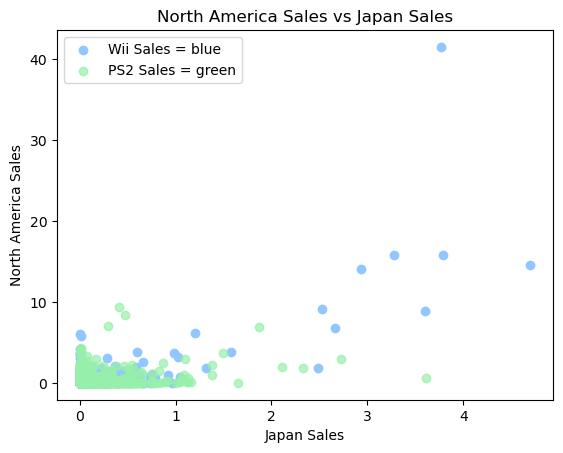

In [10]:
fig4, ax4 = plt.subplots()
ax4.set_title ('North America Sales vs Japan Sales')
ax4.set_xlabel('Japan Sales')
ax4.set_ylabel('North America Sales')
ax4.scatter(WG['JP_Sales'], WG['NA_Sales'])
ax4.scatter(PS2['JP_Sales'], PS2['NA_Sales'], alpha = .7)
ax4.legend(['Wii Sales = blue', 'PS2 Sales = green'])
plt.style.use('seaborn-v0_8-pastel')
plt.show()

In [15]:
WVG = game.loc[game['Console'] == 'Wii']
# pd.DataFrame(WVG)

In [16]:
PSVG = game.loc[game['Console'] == 'PS2']
# pd.DataFrame(PSVG)